<a href="https://colab.research.google.com/github/swarubm/ML-ALGORITHMS/blob/main/classification%20part%201%20and%202%20%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data_income = pd.read_csv("/content/income(1).csv")

In [4]:
data = data_income.copy()

In [5]:
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


# 1 Getting data information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [7]:
data.isnull().sum()

,0
age,0
JobType,0
EdType,0
maritalstatus,0
occupation,0
relationship,0
race,0
gender,0
capitalgain,0
capitalloss,0


In [8]:
stats = data.describe()

In [9]:
stats

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [10]:
mini_stat = data.describe(include='O')

In [11]:
mini_stat

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [12]:
jt = data['JobType'].value_counts()
oc= data['occupation'].value_counts()

In [13]:
jt

,count
JobType,
Private,22286
Self-emp-not-inc,2499
Local-gov,2067
?,1809
State-gov,1279
Self-emp-inc,1074
Federal-gov,943
Without-pay,14
Never-worked,7


In [14]:
oc

,count
occupation,
Prof-specialty,4038
Craft-repair,4030
Exec-managerial,3992
Adm-clerical,3721
Sales,3584
Other-service,3212
Machine-op-inspct,1966
?,1816
Transport-moving,1572


In [15]:
print(data['JobType'].unique())
print(data['occupation'].unique())

[' Private' ' Federal-gov' ' ?' ' Self-emp-inc' ' Self-emp-not-inc'
 ' Local-gov' ' State-gov' ' Without-pay' ' Never-worked']
[' Adm-clerical' ' Armed-Forces' ' Prof-specialty' ' Craft-repair'
 ' Sales' ' Exec-managerial' ' Machine-op-inspct' ' ?' ' Transport-moving'
 ' Farming-fishing' ' Tech-support' ' Other-service' ' Handlers-cleaners'
 ' Protective-serv' ' Priv-house-serv']


In [16]:
data = pd.read_csv("/content/income(1).csv",na_values=[' ?'])

In [17]:
data.isnull().sum()

,0
age,0
JobType,1809
EdType,0
maritalstatus,0
occupation,1816
relationship,0
race,0
gender,0
capitalgain,0
capitalloss,0


In [18]:
missing = data[data.isnull().any(axis=1)]

In [19]:
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [20]:
data2 = data.dropna(axis = 0)

In [21]:
correlation = data2.select_dtypes(include=np.number).corr()

In [22]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

Gender proportion Table

In [23]:
gender = pd.crosstab(index=data2['gender'],
                     columns='count',
                     normalize = True )

In [24]:
print(gender)

col_0      count
gender          
Female  0.324315
Male    0.675685


gender vs salary status

In [25]:
gen_sal_status = pd.crosstab( index=data2['gender'],
                             columns=data2['SalStat'],
                     margins = True,
                     normalize = 'index')

In [26]:
gen_sal_status

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


frequency distribution of salary status

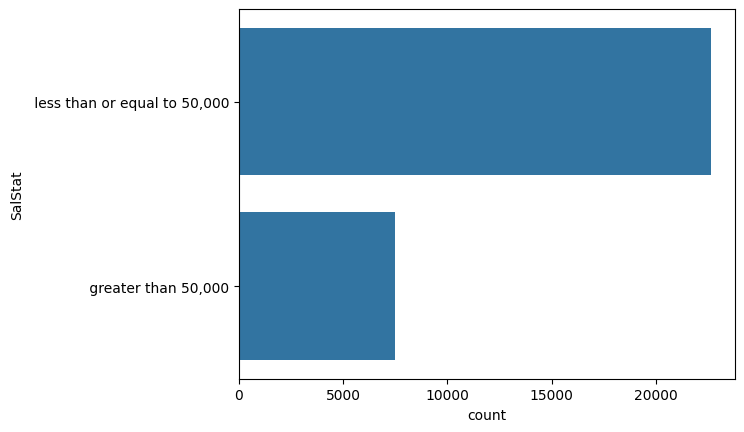

In [27]:
salstat = sns.countplot(data2['SalStat'])

histogram for age

/tmp/ipython-input-1757446510.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['age'],bins=10,kde=False)


<Axes: xlabel='age'>

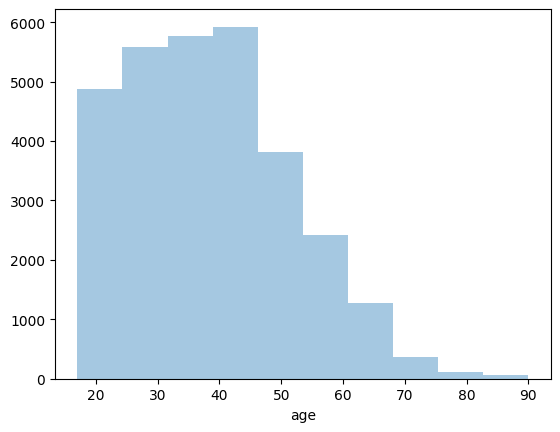

In [28]:
sns.distplot(data2['age'],bins=10,kde=False)

box plot age vs sal status

In [29]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

<Axes: xlabel='SalStat', ylabel='age'>

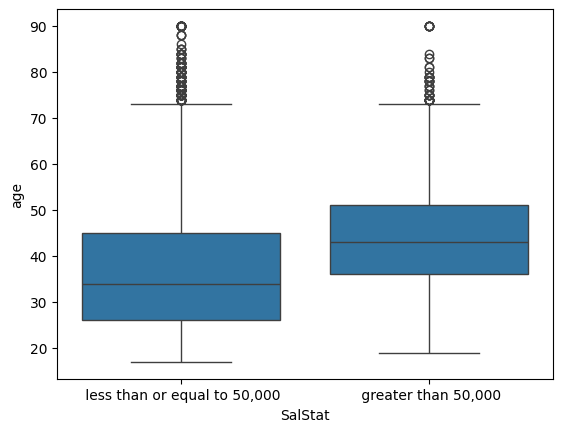

In [30]:
sns.boxplot(x='SalStat', y='age', data=data2)


In [31]:
data2.groupby('SalStat')['age'].median()

,age
SalStat,
"greater than 50,000",43.0
"less than or equal to 50,000",34.0


EDA

jobtype vs sal stat

educations vs sal stat


occupation vs sal stat


cg and cl


hours per week vs sal stat

# logistic regression

reindexing categorical data to 0 and 1

In [33]:
data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

/tmp/ipython-input-1501614369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat'] = data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


In [35]:
data2.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0


In [38]:
new_data = pd.get_dummies(data2,drop_first=True)

In [40]:
columns_list = list(new_data.columns)

# seperating input names from the data

In [45]:
features = list(set(columns_list)-set(['SalStat']))
features

['EdType_ Some-college',
 'nativecountry_ United-States',
 'nativecountry_ South',
 'occupation_ Armed-Forces',
 'occupation_ Protective-serv',
 'EdType_ 12th',
 'nativecountry_ Poland',
 'EdType_ Prof-school',
 'nativecountry_ Germany',
 'EdType_ 11th',
 'occupation_ Exec-managerial',
 'capitalloss',
 'nativecountry_ Canada',
 'nativecountry_ Laos',
 'race_ Asian-Pac-Islander',
 'nativecountry_ England',
 'nativecountry_ Mexico',
 'nativecountry_ China',
 'nativecountry_ France',
 'nativecountry_ Haiti',
 'JobType_ State-gov',
 'nativecountry_ Honduras',
 'occupation_ Priv-house-serv',
 'maritalstatus_ Separated',
 'nativecountry_ India',
 'nativecountry_ Scotland',
 'occupation_ Handlers-cleaners',
 'relationship_ Unmarried',
 'hoursperweek',
 'nativecountry_ Thailand',
 'nativecountry_ Columbia',
 'nativecountry_ Outlying-US(Guam-USVI-etc)',
 'JobType_ Private',
 'EdType_ Masters',
 'nativecountry_ Trinadad&Tobago',
 'JobType_ Without-pay',
 'nativecountry_ Vietnam',
 'EdType_ Docto

# Storing output value in Y

In [47]:
y = new_data['SalStat'].values
y

array([0, 0, 1, ..., 0, 0, 0])

storing input values from features

In [48]:
x = new_data[features].values
x

array([[False, True, False, ..., False, False, False],
       [False, True, False, ..., True, False, False],
       [True, True, False, ..., True, False, False],
       ...,
       [True, True, False, ..., True, False, False],
       [True, True, False, ..., False, False, False],
       [False, True, False, ..., True, False, False]], dtype=object)

split data

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [50]:
Algorithm = LogisticRegression()

In [56]:
Algorithm.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
Algorithm.coef_

array([[-3.94339086e-01, -4.22149081e-01, -2.66541989e-02,
        -1.94418578e-03, -1.43396279e-02, -9.58703723e-02,
        -9.37759489e-03,  2.34142174e-01,  1.45473131e-02,
        -3.04562958e-01,  8.97352547e-01,  6.70124986e-04,
         3.58135035e-03, -6.17129185e-03, -1.18528432e-01,
         1.26960789e-02, -2.58107286e-01, -2.25561810e-02,
         5.71864451e-03, -1.18505330e-02, -1.27377702e-01,
        -2.24809781e-03, -4.06115560e-02, -1.79171059e-01,
        -2.04402814e-02, -3.30714320e-03, -3.39197359e-01,
        -5.74886878e-01,  9.31338508e-03, -3.35526190e-03,
        -2.02346096e-02, -7.43232083e-03, -3.19729628e-01,
         5.26856821e-01, -4.49386017e-03, -8.14717115e-03,
        -3.37724800e-02,  2.48736738e-01, -4.14711844e-02,
        -8.37060884e-03, -1.40655622e-01, -2.64166111e-02,
        -9.33368825e-01, -5.97586147e-02, -7.39915201e-01,
        -1.95706305e-01,  1.17528410e-01, -3.97375903e-02,
         2.46210404e-01, -5.85541306e-01, -5.35037956e-0

In [58]:
Algorithm.intercept_

array([-1.0397327])

In [59]:
prediction = Algorithm.predict(x_test)

In [60]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
confusion_matrix(y_test,prediction)

array([[6293,  530],
       [ 954, 1272]])

In [92]:
confusion_matrix = confusion_matrix(y_test,prediction)

In [68]:
accuracy_score(y_test,prediction)

0.8360039783401481

In [70]:
('misclassified samples %d' % (y_test != prediction).sum())

'misclassified samples 1484'

removing insignificant variables

In [71]:
data2['SalStat'] = data2['SalStat'].map({'less than or equal to 50,000':0,'greater than 50,000':1})

/tmp/ipython-input-204120290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat'] = data2['SalStat'].map({'less than or equal to 50,000':0,'greater than 50,000':1})


In [72]:
data2['SalStat']

,SalStat
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
31973,NaN
31974,NaN
31975,NaN
31976,NaN


In [73]:
features = list(set(columns_list)-set(['SalStat']))
features

['EdType_ Some-college',
 'nativecountry_ United-States',
 'nativecountry_ South',
 'occupation_ Armed-Forces',
 'occupation_ Protective-serv',
 'EdType_ 12th',
 'nativecountry_ Poland',
 'EdType_ Prof-school',
 'nativecountry_ Germany',
 'EdType_ 11th',
 'occupation_ Exec-managerial',
 'capitalloss',
 'nativecountry_ Canada',
 'nativecountry_ Laos',
 'race_ Asian-Pac-Islander',
 'nativecountry_ England',
 'nativecountry_ Mexico',
 'nativecountry_ China',
 'nativecountry_ France',
 'nativecountry_ Haiti',
 'JobType_ State-gov',
 'nativecountry_ Honduras',
 'occupation_ Priv-house-serv',
 'maritalstatus_ Separated',
 'nativecountry_ India',
 'nativecountry_ Scotland',
 'occupation_ Handlers-cleaners',
 'relationship_ Unmarried',
 'hoursperweek',
 'nativecountry_ Thailand',
 'nativecountry_ Columbia',
 'nativecountry_ Outlying-US(Guam-USVI-etc)',
 'JobType_ Private',
 'EdType_ Masters',
 'nativecountry_ Trinadad&Tobago',
 'JobType_ Without-pay',
 'nativecountry_ Vietnam',
 'EdType_ Docto

In [75]:
x = new_data[features].values

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [77]:
logistic = LogisticRegression()

In [79]:
logistic.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
prediction = logistic.predict(x_test)

In [81]:
accuracy_score = accuracy_score(y_test,prediction)

In [82]:
accuracy_score

0.8360039783401481

# implementing KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [84]:
KNN_classifier = KNeighborsClassifier(n_neighbors=5)

In [85]:
KNN_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [86]:
prediction = KNN_classifier.predict(x_test)

In [101]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)
print(cm)


[[6176  647]
 [ 808 1418]]


In [97]:
misclassified_samples = (y_test != prediction).sum()

In [98]:
misclassified_samples

np.int64(1455)

In [104]:
misclassified_sample = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    misclassified_sample.append((y_test != pred_i).sum())

In [105]:
print(misclassified_sample)

[np.int64(1766), np.int64(1516), np.int64(1522), np.int64(1437), np.int64(1455), np.int64(1455), np.int64(1456), np.int64(1452), np.int64(1481), np.int64(1432), np.int64(1465), np.int64(1446), np.int64(1451), np.int64(1435), np.int64(1421), np.int64(1415), np.int64(1435), np.int64(1423), np.int64(1443)]
